In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/home/angel/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
directory_1 = "/home/angel/Desktop/DFT/DFT_notes/unit1/notebooks/part1_si/"
directory_2="/home/angel/Desktop/DFT/DFT_notes/unit1/notebooks/part2_cl_ion/"

In [3]:
df = pd.read_csv(directory_1+'cell1.dat', sep=r'\s+', header=None)

In [4]:
data2=pd.read_csv(directory_1+'cell2.dat', sep=r'\s+', header=None)

In [5]:
cell_lenght1=np.array(df[0])
Energy1=np.array(df[1])
cell_lenght2=np.array(data2[0])
Energy2=np.array(data2[1])

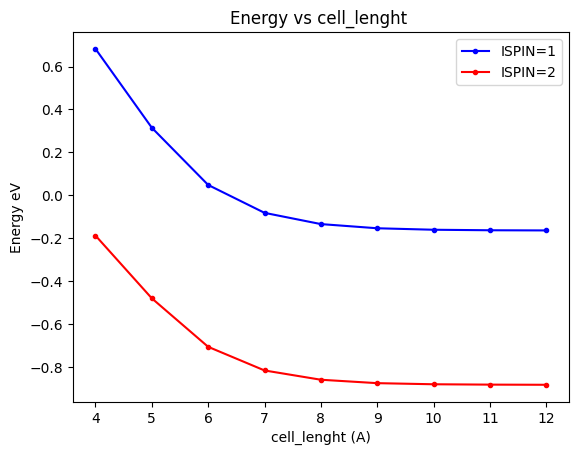

In [6]:
plt.Figure(figsize=(10,8))
plt.plot(cell_lenght1,Energy1,color='b',marker='.',linestyle='-',label='ISPIN=1')
plt.plot(cell_lenght2,Energy2,color='r',marker='.',linestyle='-',label='ISPIN=2')
plt.xlabel('cell_lenght (A)')
plt.ylabel('Energy eV')
plt.title('Energy vs cell_lenght ')
plt.legend() 
plt.show()

# THE CHLORIDE ION

In [7]:
data_cl_io1=pd.read_csv(directory_2+'cell1.dat', sep=r'\s+', header=None)
data_cl_io2=pd.read_csv(directory_2+'cell2.dat', sep=r'\s+', header=None)

In [8]:
c_len_ci1=np.array(data_cl_io1[0])
Energy_ci1=np.array(data_cl_io1[1])
c_len_ci2=np.array(data_cl_io2[0])
Energy_ci2=np.array(data_cl_io2[1])

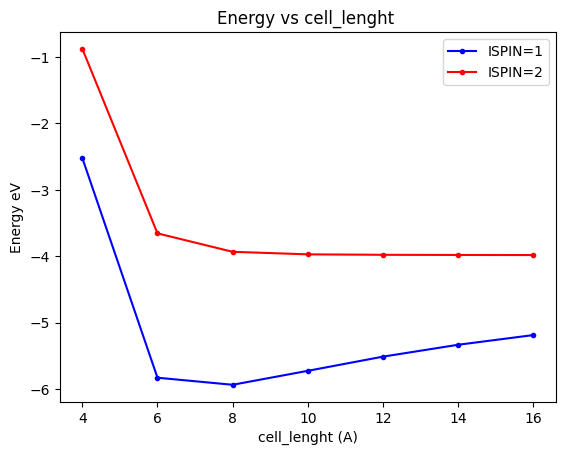

In [9]:
plt.Figure(figsize=(10,8))
plt.plot(c_len_ci1,Energy_ci1,color='b',marker='.',linestyle='-',label='ISPIN=1')
plt.plot(c_len_ci2,Energy_ci2,color='r',marker='.',linestyle='-',label='ISPIN=2')
plt.xlabel('cell_lenght (A)')
plt.ylabel('Energy eV')
plt.title('Energy vs cell_lenght ')
plt.legend() 
plt.show()

In [17]:
# import the data needed 
celldat=pd.read_csv('cell.dat', sep=r'\s+', header=None)
celldat

,0,1
0,5.28,-11.857580
1,5.30,-11.875971
2,5.32,-11.890877
3,5.34,-11.902368
4,5.36,-11.910567
5,5.38,-11.915589
6,5.40,-11.917560
7,5.42,-11.916586
8,5.44,-11.912762
9,5.46,-11.906186


In [45]:
# let's try a fitting 
def EOF(V,param):
    E_0=param[0]
    V_0=param[1]
    B_0=param[2]
    Bp_0=param[3]
    equation=E_0 + 9*V_0*B_0/16 * ((V_0/V)**2/3 -1)**3 * Bp_0 + [(V_0/V)**(2/3) -1]**2 * (6 - 4*(V_0/V)**(2/3))
    return  equation 

import scipy.optimize as opt
# initial guess
parameters=[-10, 100, 100, 4]


In [46]:
print(*parameters)

-10 100 100 4


In [ ]:
E_0=parameters[0]
V_0=parameters[1]
B_0=parameters[2]
Bp_0=parameters[3]
V=celldat[0]
Energy=celldat[1]
par, covariance = opt.curve_fit(EOF, V, Energy, parameters)
print(parameters)
print(covariance)   

TypeError: EOF() takes 2 positional arguments but 5 were given